<a href="https://colab.research.google.com/github/dovileservaite/Duomenu_gavyba/blob/main/DS_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WDI Wold Development Index - populiacijos kitimas per metus salyse. Duomenis WDId reikia isvalyti ir transponuoti

In [ ]:
import pandas as pd
# ikeliu duomenis is Github, taip patogiau
url="https://raw.githubusercontent.com/GabrieleKasputyte/Duomenu-gavyba/main/CSV/WDI-pop-struct.csv"
WDId = pd.read_csv(url,encoding="latin")

In [ ]:
WDId.drop(columns=['Country Code','Series Code'], axis=1, inplace=True)


In [ ]:
old_columns=list(WDId.columns)
tcolumns=old_columns[2:]
for column in range(len(tcolumns)):
  tcolumns[column]=tcolumns[column].split(' ')[0]
new_columns=old_columns[:2]+tcolumns

In [ ]:
WDId.columns=new_columns
WDId

,Country Name,Series Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,"Population, male",4649576,4730252,4816049,4907033,5003250,5104766,5210120,5319118,5434457,5559838,5697018,5845348,6000891,6157843,6308578,6446271,6573732,6689150,6776022,6813203,6788279,6698727,6557678,6388703,6224256,6091891,5988521,5918154,5922667,6054347,6344615,6821674,7461094,8176786,8848710,9392624,9770489,10012241,10184269,10386587,10689506,11117752,11642104,12214634,12763723,13239686,13623891,13938967,14225722,14544059,14935754,15415362,15964873,16554276,17138798,17686166,18187045,18652134,19093281,19529725,..
1,Afghanistan,"Population, female",4347397,4439158,4535392,4636172,4741531,4851554,4964716,5080808,5202606,5333938,5476624,5630097,5790324,5951120,6104372,6242889,6369361,6482156,6565176,6597853,6568232,6472946,6324850,6149027,5980036,5846317,5747658,5686380,5695338,5814530,6067693,6477343,7024452,7639817,8227017,8718033,9082948,9344885,9553496,9784257,10090447,10489236,10958666,11466237,11962961,12414591,12809158,13161569,13496554,13850754,14249753,14702051,15196503,15715313,16231996,16727437,17196083,17644266,18079105,18512029,..
2,Afghanistan,"Population ages 80 and above, male (% of male ...",0.178381972,0.196247556,0.207908971,0.211451734,0.205246795,0.187471901,0.203642064,0.213418641,0.215458469,0.208783137,0.192030084,0.207566663,0.217250927,0.219167653,0.212076151,0.195027421,0.208815936,0.215154585,0.212617342,0.200581077,0.178012876,0.195992375,0.2071619,0.207350348,0.192440454,0.158669995,0.17129441,0.179464685,0.180763099,0.172983205,0.154288273,0.160107352,0.165619188,0.17113083,0.17708794,0.184048616,0.196745446,0.204180063,0.206485059,0.203791639,0.195790115,0.206039817,0.211963368,0.212900362,0.20866164,0.199279681,0.211914419,0.220410834,0.223721462,0.221196908,0.212844934,0.220805727,0.224492846,0.223954195,0.219262687,0.210520471,0.222076282,0.229793236,0.233325824,0.232778472,..
3,Afghanistan,"Population ages 80 and above, female (% of fem...",0.172195113,0.188279033,0.199343298,0.20396146,0.200631569,0.188249,0.203818223,0.213883093,0.217237285,0.213050925,0.200415219,0.214916292,0.2242015,0.226999288,0.22280734,0.210943936,0.226364937,0.234551808,0.233702798,0.222829996,0.201089274,0.21920457,0.228717067,0.225499054,0.205784473,0.165608593,0.180960694,0.192635669,0.197459712,0.192741354,0.176871147,0.187854804,0.198378492,0.208827019,0.219666496,0.231210359,0.247298483,0.257574063,0.262249492,0.261746982,0.25612339,0.268389372,0.276228826,0.278539507,0.274823219,0.265429628,0.277918259,0.285338256,0.287628933,0.285038696,0.278039868,0.28864002,0.295081027,0.297143283,0.294972875,0.28886075,0.303802609,0.314761978,0.320982291,0.322093255,..
4,Afghanistan,"Population ages 75-79, male (% of male populat...",0.423329196,0.4333809,0.43708018,0.434702865,0.427282694,0.415905531,0.424999645,0.429281293,0.427751949,0.419742597,0.406212085,0.408410034,0.405156231,0.398240098,0.389548651,0.380374831,0.385595275,0.387418779,0.385078386,0.377414154,0.364407855,0.36805484,0.364611044,0.355439851,0.340104523,0.316404321,0.32134818,0.322076674,0.319079118,0.312155981,0.300727373,0.307490553,0.314042502,0.321165348,0.330884351,0.344887538,0.352561534,0.358481183,0.362588509,0.364267807,0.363131774,0.36214149,0.359359381,0.354320891,0.346912806,0.338384209,0.338640283,0.336976118,0.335455662,0.335649171,0.337739851,0.339622277,0.341412027,0.343198296,0.345257484,0.348198699,0.356282077,0.363425126,0.370218618,0.377240296,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# Ismesti eilutes kuriose yra NaN

In [ ]:
WDIdna = WDId.dropna()

In [ ]:
WDIdna.columns

Index(['Country Name', 'Series Name', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [ ]:
WDIdna

,Country Name,Series Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,"Population, male",4649576,4730252,4816049,4907033,5003250,5104766,5210120,5319118,5434457,5559838,5697018,5845348,6000891,6157843,6308578,6446271,6573732,6689150,6776022,6813203,6788279,6698727,6557678,6388703,6224256,6091891,5988521,5918154,5922667,6054347,6344615,6821674,7461094,8176786,8848710,9392624,9770489,10012241,10184269,10386587,10689506,11117752,11642104,12214634,12763723,13239686,13623891,13938967,14225722,14544059,14935754,15415362,15964873,16554276,17138798,17686166,18187045,18652134,19093281,19529725,..
1,Afghanistan,"Population, female",4347397,4439158,4535392,4636172,4741531,4851554,4964716,5080808,5202606,5333938,5476624,5630097,5790324,5951120,6104372,6242889,6369361,6482156,6565176,6597853,6568232,6472946,6324850,6149027,5980036,5846317,5747658,5686380,5695338,5814530,6067693,6477343,7024452,7639817,8227017,8718033,9082948,9344885,9553496,9784257,10090447,10489236,10958666,11466237,11962961,12414591,12809158,13161569,13496554,13850754,14249753,14702051,15196503,15715313,16231996,16727437,17196083,17644266,18079105,18512029,..
2,Afghanistan,"Population ages 80 and above, male (% of male ...",0.178381972,0.196247556,0.207908971,0.211451734,0.205246795,0.187471901,0.203642064,0.213418641,0.215458469,0.208783137,0.192030084,0.207566663,0.217250927,0.219167653,0.212076151,0.195027421,0.208815936,0.215154585,0.212617342,0.200581077,0.178012876,0.195992375,0.2071619,0.207350348,0.192440454,0.158669995,0.17129441,0.179464685,0.180763099,0.172983205,0.154288273,0.160107352,0.165619188,0.17113083,0.17708794,0.184048616,0.196745446,0.204180063,0.206485059,0.203791639,0.195790115,0.206039817,0.211963368,0.212900362,0.20866164,0.199279681,0.211914419,0.220410834,0.223721462,0.221196908,0.212844934,0.220805727,0.224492846,0.223954195,0.219262687,0.210520471,0.222076282,0.229793236,0.233325824,0.232778472,..
3,Afghanistan,"Population ages 80 and above, female (% of fem...",0.172195113,0.188279033,0.199343298,0.20396146,0.200631569,0.188249,0.203818223,0.213883093,0.217237285,0.213050925,0.200415219,0.214916292,0.2242015,0.226999288,0.22280734,0.210943936,0.226364937,0.234551808,0.233702798,0.222829996,0.201089274,0.21920457,0.228717067,0.225499054,0.205784473,0.165608593,0.180960694,0.192635669,0.197459712,0.192741354,0.176871147,0.187854804,0.198378492,0.208827019,0.219666496,0.231210359,0.247298483,0.257574063,0.262249492,0.261746982,0.25612339,0.268389372,0.276228826,0.278539507,0.274823219,0.265429628,0.277918259,0.285338256,0.287628933,0.285038696,0.278039868,0.28864002,0.295081027,0.297143283,0.294972875,0.28886075,0.303802609,0.314761978,0.320982291,0.322093255,..
4,Afghanistan,"Population ages 75-79, male (% of male populat...",0.423329196,0.4333809,0.43708018,0.434702865,0.427282694,0.415905531,0.424999645,0.429281293,0.427751949,0.419742597,0.406212085,0.408410034,0.405156231,0.398240098,0.389548651,0.380374831,0.385595275,0.387418779,0.385078386,0.377414154,0.364407855,0.36805484,0.364611044,0.355439851,0.340104523,0.316404321,0.32134818,0.322076674,0.319079118,0.312155981,0.300727373,0.307490553,0.314042502,0.321165348,0.330884351,0.344887538,0.352561534,0.358481183,0.362588509,0.364267807,0.363131774,0.36214149,0.359359381,0.354320891,0.346912806,0.338384209,0.338640283,0.336976118,0.335455662,0.335649171,0.337739851,0.339622277,0.341412027,0.343198296,0.345257484,0.348198699,0.356282077,0.363425126,0.370218618,0.377240296,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
df = pd.DataFrame(WDIdna.iloc[:,2:62])
df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,4649576,4730252,4816049,4907033,5003250,5104766,5210120,5319118,5434457,5559838,5697018,5845348,6000891,6157843,6308578,6446271,6573732,6689150,6776022,6813203,6788279,6698727,6557678,6388703,6224256,6091891,5988521,5918154,5922667,6054347,6344615,6821674,7461094,8176786,8848710,9392624,9770489,10012241,10184269,10386587,10689506,11117752,11642104,12214634,12763723,13239686,13623891,13938967,14225722,14544059,14935754,15415362,15964873,16554276,17138798,17686166,18187045,18652134,19093281,19529725
1,4347397,4439158,4535392,4636172,4741531,4851554,4964716,5080808,5202606,5333938,5476624,5630097,5790324,5951120,6104372,6242889,6369361,6482156,6565176,6597853,6568232,6472946,6324850,6149027,5980036,5846317,5747658,5686380,5695338,5814530,6067693,6477343,7024452,7639817,8227017,8718033,9082948,9344885,9553496,9784257,10090447,10489236,10958666,11466237,11962961,12414591,12809158,13161569,13496554,13850754,14249753,14702051,15196503,15715313,16231996,16727437,17196083,17644266,18079105,18512029
2,0.178381972,0.196247556,0.207908971,0.211451734,0.205246795,0.187471901,0.203642064,0.213418641,0.215458469,0.208783137,0.192030084,0.207566663,0.217250927,0.219167653,0.212076151,0.195027421,0.208815936,0.215154585,0.212617342,0.200581077,0.178012876,0.195992375,0.2071619,0.207350348,0.192440454,0.158669995,0.17129441,0.179464685,0.180763099,0.172983205,0.154288273,0.160107352,0.165619188,0.17113083,0.17708794,0.184048616,0.196745446,0.204180063,0.206485059,0.203791639,0.195790115,0.206039817,0.211963368,0.212900362,0.20866164,0.199279681,0.211914419,0.220410834,0.223721462,0.221196908,0.212844934,0.220805727,0.224492846,0.223954195,0.219262687,0.210520471,0.222076282,0.229793236,0.233325824,0.232778472
3,0.172195113,0.188279033,0.199343298,0.20396146,0.200631569,0.188249,0.203818223,0.213883093,0.217237285,0.213050925,0.200415219,0.214916292,0.2242015,0.226999288,0.22280734,0.210943936,0.226364937,0.234551808,0.233702798,0.222829996,0.201089274,0.21920457,0.228717067,0.225499054,0.205784473,0.165608593,0.180960694,0.192635669,0.197459712,0.192741354,0.176871147,0.187854804,0.198378492,0.208827019,0.219666496,0.231210359,0.247298483,0.257574063,0.262249492,0.261746982,0.25612339,0.268389372,0.276228826,0.278539507,0.274823219,0.265429628,0.277918259,0.285338256,0.287628933,0.285038696,0.278039868,0.28864002,0.295081027,0.297143283,0.294972875,0.28886075,0.303802609,0.314761978,0.320982291,0.322093255
4,0.423329196,0.4333809,0.43708018,0.434702865,0.427282694,0.415905531,0.424999645,0.429281293,0.427751949,0.419742597,0.406212085,0.408410034,0.405156231,0.398240098,0.389548651,0.380374831,0.385595275,0.387418779,0.385078386,0.377414154,0.364407855,0.36805484,0.364611044,0.355439851,0.340104523,0.316404321,0.32134818,0.322076674,0.319079118,0.312155981,0.300727373,0.307490553,0.314042502,0.321165348,0.330884351,0.344887538,0.352561534,0.358481183,0.362588509,0.364267807,0.363131774,0.36214149,0.359359381,0.354320891,0.346912806,0.338384209,0.338640283,0.336976118,0.335455662,0.335649171,0.337739851,0.339622277,0.341412027,0.343198296,0.345257484,0.348198699,0.356282077,0.363425126,0.370218618,0.377240296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,8.31191627,8.344987629,8.437539577,8.580575884,8.758179772,8.955595493,9.141349307,9.357298864,9.5696925,9.733533829,9.827690833,9.841178084,9.793810541,9.716221552,9.654232877,9.636628864,9.648753378,9.697310136,9.769514225,9.844385894,9.9077661,9.959497911,10.00236662,10.0309592,10.03820187,10.020

In [ ]:
# convert all columns of DataFrame
#df = df.apply(pd.to_numeric) # convert all columns of DataFrame
df = df.apply(pd.to_numeric, errors='coerce')

# convert just columns "a" and "b"
#df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)

In [ ]:
print (df)
print (df.dtypes)

In [ ]:
WDIdna = pd.concat([WDIdna.iloc[:,0:2].reset_index(drop=True), df], axis=1)

In [ ]:
WDIdna = WDIdna.dropna()
WDIdna

# **Hierarchical clustering**




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [ ]:
WDIdna.iloc[:, 2:62]

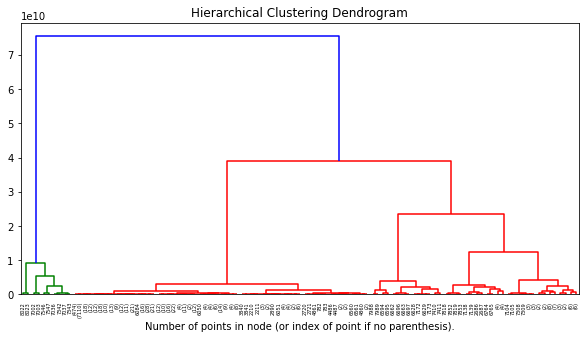

In [ ]:
X = WDIdna.iloc[:, 2:62]

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(10,5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=7)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
labels = model.labels_
labels

array([6879, 4799, 7747, ...,    2,    1,    0])

In [ ]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

## Transponuojame WDId taip kad kiekvienoj eilutej yra salis, populiacijos kintamasis, metai ir verte  

In [ ]:
WDId_melted=pd.melt(WDId, id_vars=['Country Name','Series Name'], var_name='Year', value_name='Population')
WDId_melted.columns=['Country','Agestruct','Year','Population']
WDId_melted.dropna(inplace=True)
WDId_melted['CY']=WDId_melted['Country'] + ' ' +  WDId_melted['Year']
WDId_melted.head(n=40)

,Country,Agestruct,Year,Population,CY
0,Afghanistan,"Population, male",1960,4649576,Afghanistan 1960
1,Afghanistan,"Population, female",1960,4347397,Afghanistan 1960
2,Afghanistan,"Population ages 80 and above, male (% of male ...",1960,0.178381972,Afghanistan 1960
3,Afghanistan,"Population ages 80 and above, female (% of fem...",1960,0.172195113,Afghanistan 1960
4,Afghanistan,"Population ages 75-79, male (% of male populat...",1960,0.423329196,Afghanistan 1960
5,Afghanistan,"Population ages 75-79, female (% of female pop...",1960,0.390808839,Afghanistan 1960
6,Afghanistan,"Population ages 70-74, male (% of male populat...",1960,0.876381552,Afghanistan 1960
7,Afghanistan,"Population ages 70-74, female (% of female pop...",1960,0.79714422,Afghanistan 1960
8,Afghanistan,"Population ages 65-69, male (% of male populat...",1960,1.447079119,Afghanistan 1960
9,Afghanistan,"Population ages 65-69, female (% of female pop...",1960,1.302481441,Afghanistan 1960


## Iskleidziam Agestruct - padarom is reiksmiu stulpelius, gaunam kintamaji WDId_reshaped

In [ ]:
WDId_reshaped=WDId_melted.pivot( index='CY',columns='Agestruct',values='Population')

In [ ]:
WDId_reshaped.iloc[:,len(WDId_reshaped.columns)-5:len(WDId_reshaped.columns)]

Agestruct,"Population ages 75-79, male (% of male population)","Population ages 80 and above, female (% of female population)","Population ages 80 and above, male (% of male population)","Population, female","Population, male"
CY,,,,,
Afghanistan 1960,0.423329196,0.172195113,0.178381972,4347397,4649576
Afghanistan 1961,0.4333809,0.188279033,0.196247556,4439158,4730252
Afghanistan 1962,0.43708018,0.199343298,0.207908971,4535392,4816049
Afghanistan 1963,0.434702865,0.20396146,0.211451734,4636172,4907033
Afghanistan 1964,0.427282694,0.200631569,0.205246795,4741531,5003250
...,...,...,...,...,...
Zimbabwe 2016,0.388016192,0.589127547,0.22844665,7356159,6674231
Zimbabwe 2017,0.401856028,0.597985534,0.238923875,7459621,6777124
Zimbabwe 2018,0.413221519,0.599574612,0.24497323,7559801,6879217


In [ ]:
WDId_reshaped.columns

Index(['Population ages 0-14, female (% of female population)',
       'Population ages 0-14, male (% of male population)',
       'Population ages 10-14, female (% of female population)',
       'Population ages 10-14, male (% of male population)',
       'Population ages 15-19, female (% of female population)',
       'Population ages 15-19, male (% of male population)',
       'Population ages 20-24, female (% of female population)',
       'Population ages 20-24, male (% of male population)',
       'Population ages 25-29, female (% of female population)',
       'Population ages 25-29, male (% of male population)',
       'Population ages 30-34, female (% of female population)',
       'Population ages 30-34, male (% of male population)',
       'Population ages 35-39, female (% of female population)',
       'Population ages 35-39, male (% of male population)',
       'Population ages 40-44, female (% of female population)',
       'Population ages 40-44, male (% of male populati

In [ ]:
#unsWDId_melted=WDId_melted.unstack(level=-1)

# WHO savizudybiu duomenys kuriuos reikia isvalyti, rezultatu lentele yra who_data; 

In [ ]:
import pandas as pd
url="https://raw.githubusercontent.com/GabrieleKasputyte/Duomenu-gavyba/main/CSV/WHO-mort.csv"
WHOd=pd.read_csv(url)
names=list(WHOd.iloc[0,:])
WHOd.columns=names
WHOd.drop([0],axis=0,inplace=True)
WHOd.columns=["Country","Year", "PmortBoth",	"PmortMale",	"PmortFemale",	"RSuicBoth",	"RSuicMale",	"RSuicFemale"]
WHOd


In [ ]:
#print(WHOd[(WHOd["Country"]=="Afghanistan")].iloc[:,:4])
data_who=WHOd

In [ ]:
data_who.index = list(range(len(data_who)))
 
columns = list(data_who.columns)
columns.remove('Country')
columns.remove('Year')
columns

In [ ]:
for column in columns:
    for i in range(len(data_who)):
        #data_who[column] = data_who[column][i][:4]
        data_who[column][i]=data_who[column][i].split(' ')[0]

In [ ]:
for column in columns:
    for i in range(len(data_who)):
        data_who[column][i]=float(data_who[column][i])

In [ ]:
data_who['CY']=data_who['Country'] + ' ' +  data_who['Year']
data_who

,Country,Year,PmortBoth,PmortMale,PmortFemale,RSuicBoth,RSuicMale,RSuicFemale,CY
0,Afghanistan,2019,35.3,34.4,36.2,4.1,4.6,3.6,Afghanistan 2019
1,Afghanistan,2018,35.4,34.7,36,4.1,4.6,3.5,Afghanistan 2018
2,Afghanistan,2017,35.5,35,35.9,4.1,4.6,3.4,Afghanistan 2017
3,Afghanistan,2016,35.6,35.1,36,4,4.4,3.6,Afghanistan 2016
4,Afghanistan,2015,35.6,35.4,35.7,4,4.3,3.6,Afghanistan 2015
...,...,...,...,...,...,...,...,...,...
3655,Zimbabwe,2004,24.5,24.6,24.5,14.2,15.7,12.7,Zimbabwe 2004
3656,Zimbabwe,2003,23.1,23.5,22.7,13.2,15.1,11.4,Zimbabwe 2003
3657,Zimbabwe,2002,22.7,24.1,21.5,13.4,15.5,11.4,Zimbabwe 2002
3658,Zimbabwe,2001,21.7,23.6,20.2,12.8,14.4,11.3,Zimbabwe 2001


In [ ]:
data_who_both=data_who[['Country','Year','RSuicBoth']].copy()

In [ ]:
data_who_both_pivot=data_who_both.pivot(index='Country',columns='Year',values='RSuicBoth')

In [ ]:
data_who_both_pivot.iloc[[55,14,85],]

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,
Eswatini,28.4,32.2,37.2,40.5,42.4,43.9,47.3,53.9,55,54.2,50.4,47,47.6,44.6,39.2,35.1,32.8,30.4,28.5,29.4
Belarus,41.8,43.3,44.3,42.9,42.1,43.5,40.9,36.8,36.7,36.5,35.9,36.2,29.9,27.9,26.3,24.3,24.2,23.3,22.8,21.2
Kazakhstan,38.7,39,38.2,39.2,39.7,39.2,38,38,34.6,30.3,29.9,28.7,27.6,26.3,24.2,23.2,21.7,20.8,19,17.6


In [ ]:
X = data_who_both_pivot

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

In [ ]:
model.labels_

array([173, 109, 167, 121, 119, 153, 135, 125, 137, 126, 131, 177, 156,
        98, 127, 151, 110, 182, 176, 148,  97, 163, 123, 136, 169, 164,
       103, 145, 171, 165, 133,  94, 170, 105, 122, 152,  81, 146, 166,
        96, 129, 155, 149, 104, 144, 108,  48, 134, 157,  60, 180,  93,
       101, 116, 120, 159, 139, 113, 175,  95, 117, 107, 100, 124, 130,
       138, 132,  46,  72,  75, 168, 141, 114,  99,  61, 172, 178, 158,
        87, 102,  66, 150, 174, 154, 142, 115,  83,  62,  84,  92,  59,
       147,  88,  47,  82,  67,  51,  57, 181,  90,  65, 161, 106, 128,
        64, 162, 118,  50,  86,  76,  52,  53,  43,  29,  49, 143,  58,
        91, 111,  80,  41,  54,  40,  68,  63,  25,  23,  37,  74, 179,
        33, 140,  78,  73,  30,  32,  14, 112,  69,  70,  89,  28,  55,
        26,  71,  44,  77,  56,  45,  27,  13,  85,  42,  36,  31, 160,
        24,  15,  34,  35,  38,  21,  18,  12,  79,  20,  39,  19,  17,
        22,  10,  11,   9,   8,  16,   6,   4,   5,   7,   3,   

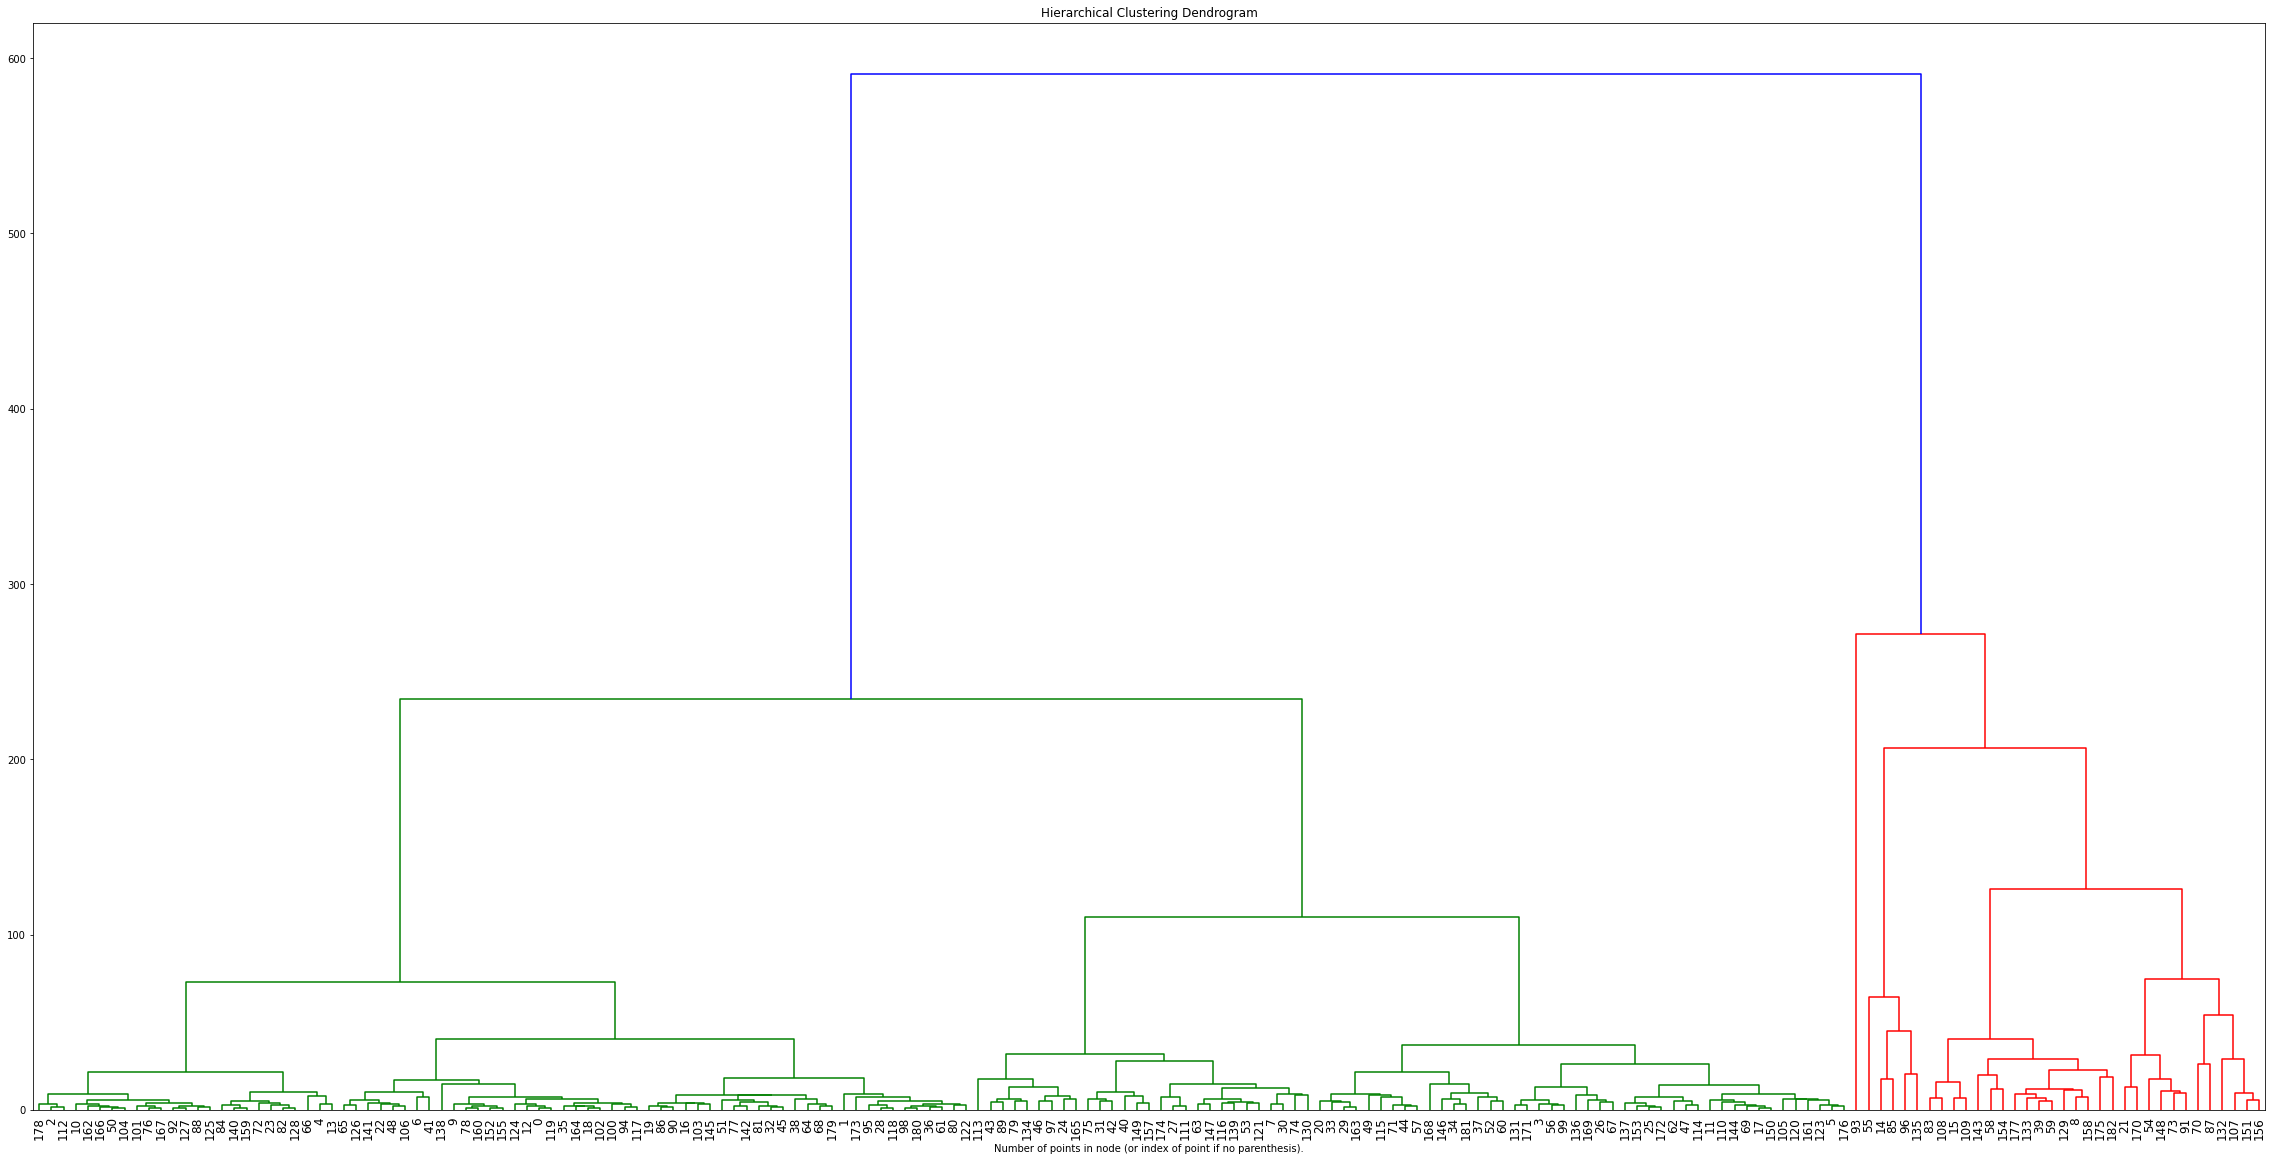

In [ ]:
plt.figure(figsize=(40,20))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode='level', p=3)
plot_dendrogram(model, truncate_mode='level', p=0)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(fontsize=12)
plt.show()